## This will need some memory...

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import tables
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
#put this also on initial exploration
meta = pd.DataFrame.from_csv('../raw/samples.all.txt', sep='\t')
ninds = meta.shape[0]

In [4]:
def get_genotypes(fname):
    h5 = tables.open_file(fname, mode='r')
    genotypes = h5.root.genotypes.read()
    h5.close()
    return genotypes

fname = 'subsample_000c1.h5'
genotypes = get_genotypes(fname)
num_snps, num_indivs, ploidy = genotypes.shape
print(num_indivs, num_snps)

765 7534


In [5]:
%%cython
def bool_to_number(ind_geno):
    if ind_geno[0] and ind_geno[1]:
        return 1
    if ind_geno[0] or ind_geno[1]:
        return 0
    return -1
#need to mean-normalize and scale

In [6]:
genotypes.reshape((num_snps, num_indivs * 2))
pca_array = np.apply_along_axis(bool_to_number, 2, genotypes)

In [7]:
pca_array_t = pca_array.transpose()  # a view!

In [8]:
my_pca = PCA(n_components=8)
my_pca.fit(pca_array_t)
trans = my_pca.transform(pca_array_t)

In [9]:
trans.shape

(765, 8)

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


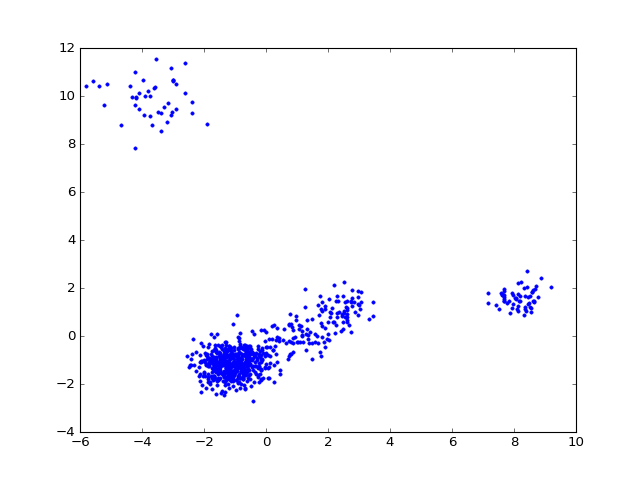

In [11]:
xs = []
ys = []
for indiv in trans:
    x, y = indiv[0], indiv[1]
    xs.append(x)
    ys.append(y)
plt.plot(xs, ys, '.')
    